### Multivariate Outlier Analysis 

#### Local Outlier Factor

In [2]:
import numpy as np
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include = ['float64', 'int64'])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
from sklearn.neighbors import LocalOutlierFactor

In [7]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [8]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [9]:
df_scores = clf.negative_outlier_factor_

In [10]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [11]:
np.sort(df_scores)[0:10]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387])

In [12]:
np.sort(df_scores)[13]

-3.823787967755565

In [13]:
threshold_val = np.sort(df_scores)[13]

In [17]:
outlier = df[df_scores < threshold_val]
outlier

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [15]:
new_df = df[df_scores > threshold_val]

In [ ]:
# new_df

In [41]:
df[df_scores == threshold_val]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


### Single Variable Outlier Analysis

In [19]:
df_table = df['table']

In [20]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

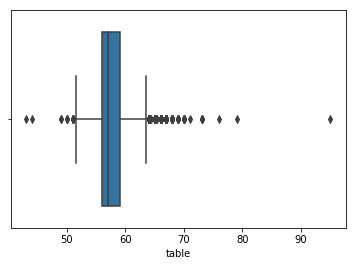

In [21]:
sns.boxplot(x = df_table);

In [22]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IOR = Q3 - Q1

In [23]:
alt_sinir = Q1 - 1.5 * IOR
ust_sinir = Q3 + 1.5 * IOR

In [24]:
alt_sinir

51.5

In [25]:
ust_sinir

63.5

In [26]:
aykiri_tf = (df_table < alt_sinir) | (df_table > ust_sinir)
aykiri_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [ ]:
# df_table[aykiri_tf]

#### Solving The Outlier Problem

##### 1. Deletion Method

In [29]:
import pandas as pd
df_table = pd.DataFrame(df_table)

In [31]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis = 1)]

##### 2. Fill with Average Method

In [33]:
df_table.mean()

table    57.457184
dtype: float64

In [36]:
df_table[aykiri_tf] = 57.457184

In [4]:
# df.apply(lambda x: x.fillna(x.mean()), axis = 0)

##### 3. Suppression Method

In [39]:
df_table[aykiri_tf < alt_sinir] = alt_sinir 
df_table[aykiri_tf > ust_sinir] = ust_sinir

In [5]:
# df_table[aykiri_tf]

### Detection of Missing Values

In [ ]:
# Number of exact values in variables
df.notnull().sum()

In [ ]:
# Number of missing values in variables
df.isnull().sum()

In [ ]:
# total number of missing values in the data set
df.isnull().sum().sum()

In [ ]:
# has at least one missing value
df[df.isnull().any(axis = 1)]

In [ ]:
# with all values
df[df.notnull().all(axis = 1)]

### Visualizing Missing Data Structure

In [6]:
!pip install missingno

In [7]:
import missingno as msno

In [8]:
import seaborn as sns
df = sns.load_dataset('planets')

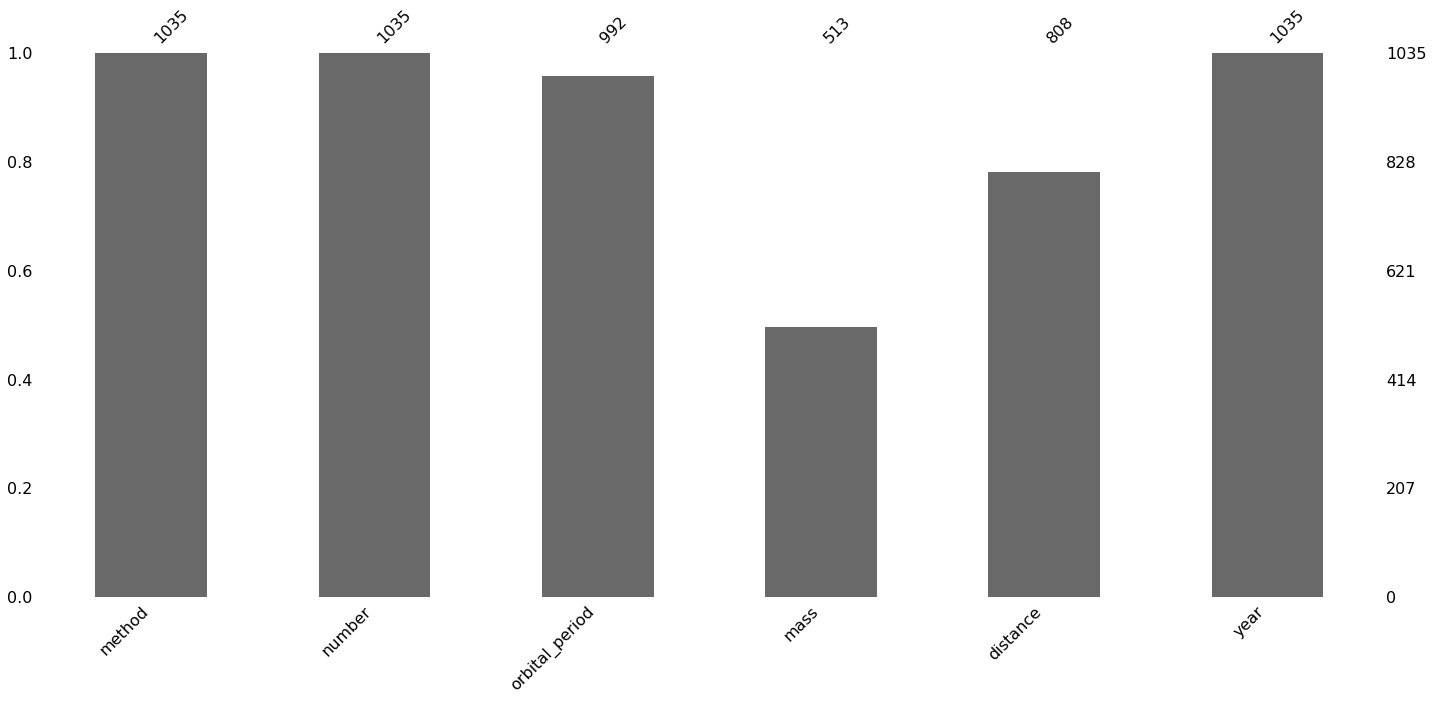

In [9]:
msno.bar(df);

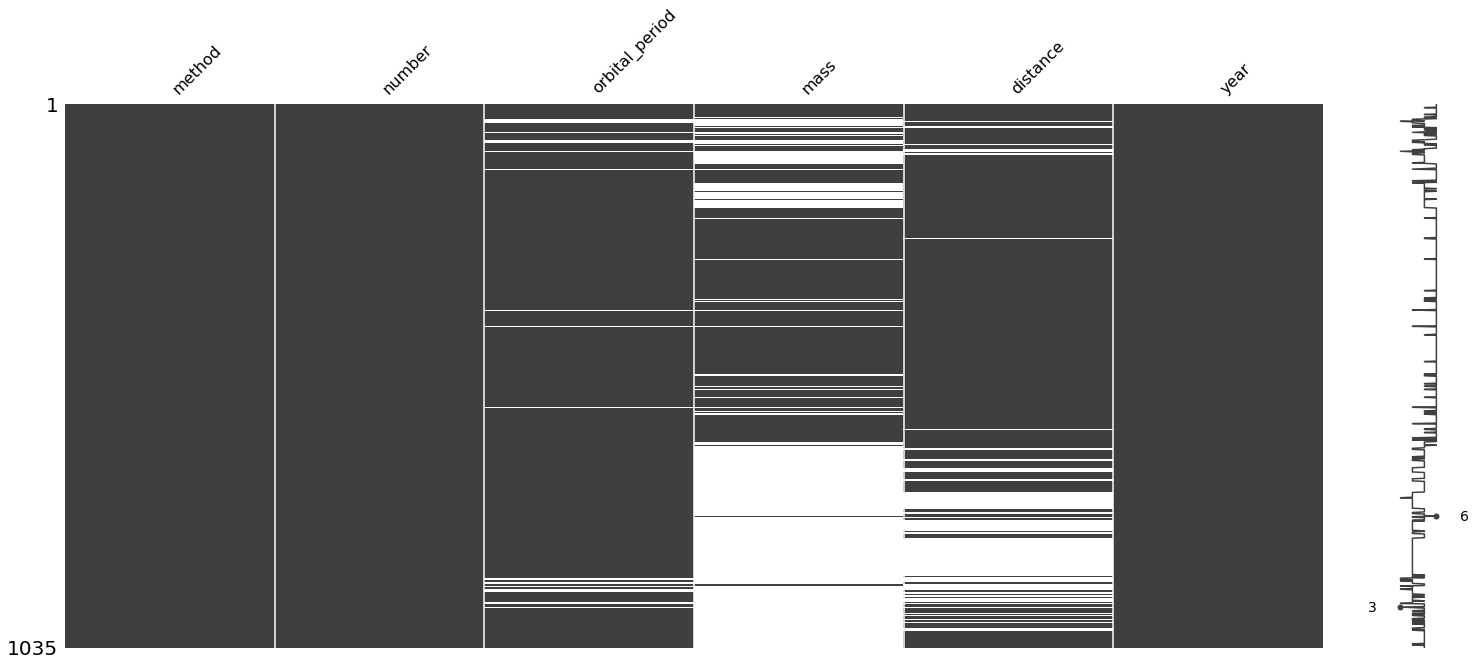

In [10]:
msno.matrix(df);

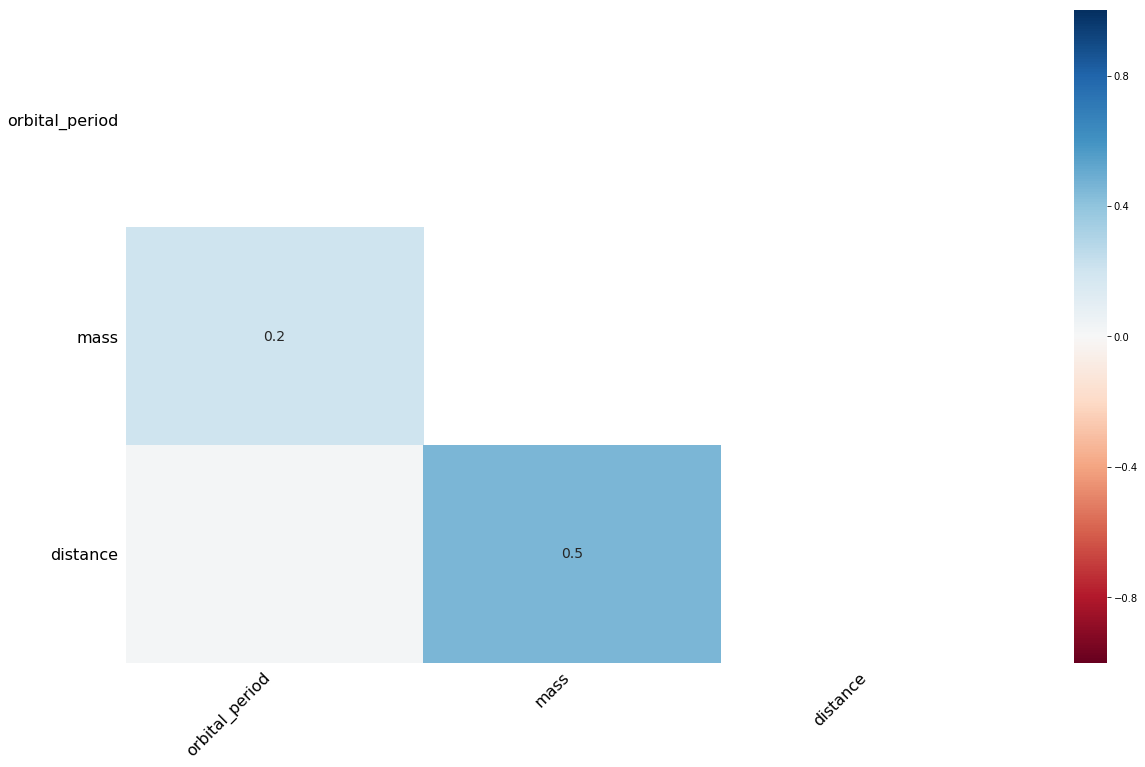

In [11]:
msno.heatmap(df);